In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
import altair as alt



from sklearn.model_selection import cross_val_score, cross_validate
from sklearn.pipeline import make_pipeline
from sklearn.impute import SimpleImputer
from sklearn.compose import make_column_transformer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder, OrdinalEncoder


from sklearn.dummy import DummyClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression, RidgeClassifier
from sklearn.naive_bayes import GaussianNB, MultinomialNB
from sklearn.svm import SVC
from sklearn.metrics import make_scorer, accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, roc_curve, confusion_matrix
from sklearn.multiclass import OneVsRestClassifier
from scipy.stats import randint, uniform, loguniform
from sklearn.model_selection import RandomizedSearchCV
from sklearn.decomposition import PCA


In [2]:
student_df = pd.read_csv('../data/student.csv')

In [3]:
student_df.head(10)

,Marital status,Application mode,Application order,Course,Daytime/evening attendance\t,Previous qualification,Previous qualification (grade),Nacionality,Mother's qualification,Father's qualification,...,Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP,Target
0,1,17,5,171,1,1,122.0,1,19,12,...,0,0,0,0,0.000000,0,10.8,1.4,1.74,Dropout
1,1,15,1,9254,1,1,160.0,1,1,3,...,0,6,6,6,13.666667,0,13.9,-0.3,0.79,Graduate
2,1,1,5,9070,1,1,122.0,1,37,37,...,0,6,0,0,0.000000,0,10.8,1.4,1.74,Dropout
3,1,17,2,9773,1,1,122.0,1,38,37,...,0,6,10,5,12.400000,0,9.4,-0.8,-3.12,Graduate
4,2,39,1,8014,0,1,100.0,1,37,38,...,0,6,6,6,13.000000,0,13.9,-0.3,0.79,Graduate
5,2,39,1,9991,0,19,133.1,1,37,37,...,0,5,17,5,11.500000,5,16.2,0.3,-0.92,Graduate
6,1,1,1,9500,1,1,142.0,1,19,38,...,0,8,8,8,14.345000,0,15.5,2.8,-4.06,Graduate
7,1,18,4,9254,1,1,119.0,1,37,37,...,0,5,5,0,0.000000,0,15.5,2.8,-4.06,Dropout
8,1,1,3,9238,1,1,137.0,62,1,1,...,0,6,7,6,14.142857,0,16.2,0.3,-0.92,Graduate
9,1,1,1,9238,1,1,138.0,1,1,19,...,0,6,14,2,13.500000,0,8.9,1.4,3.51,Dropout


In [4]:
print("The dataset has {} rows and {} columns. The target variable is {}".format(student_df.shape[0], student_df.shape[1], student_df.columns[-1]))

The dataset has 4424 rows and 37 columns. The target variable is Target


In [5]:
student_df.columns

Index(['Marital status', 'Application mode', 'Application order', 'Course',
       'Daytime/evening attendance\t', 'Previous qualification',
       'Previous qualification (grade)', 'Nacionality',
       'Mother's qualification', 'Father's qualification',
       'Mother's occupation', 'Father's occupation', 'Admission grade',
       'Displaced', 'Educational special needs', 'Debtor',
       'Tuition fees up to date', 'Gender', 'Scholarship holder',
       'Age at enrollment', 'International',
       'Curricular units 1st sem (credited)',
       'Curricular units 1st sem (enrolled)',
       'Curricular units 1st sem (evaluations)',
       'Curricular units 1st sem (approved)',
       'Curricular units 1st sem (grade)',
       'Curricular units 1st sem (without evaluations)',
       'Curricular units 2nd sem (credited)',
       'Curricular units 2nd sem (enrolled)',
       'Curricular units 2nd sem (evaluations)',
       'Curricular units 2nd sem (approved)',
       'Curricular units 2nd

In [6]:
train_df_org, test_df_org = train_test_split(student_df, test_size=0.2, random_state = 123)


In [7]:
train_df = train_df_org.copy()
test_df = test_df_org.copy()

In [8]:
train_df.sort_index().head()

,Marital status,Application mode,Application order,Course,Daytime/evening attendance\t,Previous qualification,Previous qualification (grade),Nacionality,Mother's qualification,Father's qualification,...,Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP,Target
0,1,17,5,171,1,1,122.0,1,19,12,...,0,0,0,0,0.000000,0,10.8,1.4,1.74,Dropout
1,1,15,1,9254,1,1,160.0,1,1,3,...,0,6,6,6,13.666667,0,13.9,-0.3,0.79,Graduate
2,1,1,5,9070,1,1,122.0,1,37,37,...,0,6,0,0,0.000000,0,10.8,1.4,1.74,Dropout
3,1,17,2,9773,1,1,122.0,1,38,37,...,0,6,10,5,12.400000,0,9.4,-0.8,-3.12,Graduate
4,2,39,1,8014,0,1,100.0,1,37,38,...,0,6,6,6,13.000000,0,13.9,-0.3,0.79,Graduate


In [9]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3539 entries, 563 to 3582
Data columns (total 37 columns):
 #   Column                                          Non-Null Count  Dtype  
---  ------                                          --------------  -----  
 0   Marital status                                  3539 non-null   int64  
 1   Application mode                                3539 non-null   int64  
 2   Application order                               3539 non-null   int64  
 3   Course                                          3539 non-null   int64  
 4   Daytime/evening attendance	                     3539 non-null   int64  
 5   Previous qualification                          3539 non-null   int64  
 6   Previous qualification (grade)                  3539 non-null   float64
 7   Nacionality                                     3539 non-null   int64  
 8   Mother's qualification                          3539 non-null   int64  
 9   Father's qualification                      

## EDA - Univariate Analysis:

In [10]:
### Map the marital status from code to actual status
### Categorical variable
status_mapping = {
    1: 'single',
    2: 'married',
    3: 'widower',
    4: 'divorced',

    5: 'facto union',
    6: 'legally separated'
}


train_df['Marital status'] = train_df['Marital status'].map(status_mapping)
test_df['Marital status'] = test_df['Marital status'].map(status_mapping)

In [11]:
### Map the Course from code to actual Course type easier for interpretation
### Categorical variable

course_mapping = {
    33: 'Biofuel Production Technologies',
    171: 'Animation and Multimedia Design',
    8014: 'Social Service (evening attendance)',
    9003: 'Agronomy',
    9070: 'Communication Design',
    9085: 'Veterinary Nursing',
    9119: 'Informatics Engineering',
    9130: 'Equinculture',
    9147: 'Management',
    9238: 'Social Service',
    9254: 'Tourism',
    9500: 'Nursing',
    9556: 'Oral Hygiene',
    9670: 'Advertising and Marketing Management',
    9773: 'Journalism and Communication',
    9853: 'Basic Education',
    9991: 'Management (evening attendance)'
}

# Apply the mapping
train_df['Course'] = train_df['Course'].map(course_mapping)
test_df['Course'] = test_df['Course'].map(course_mapping)


In [12]:
### Map the Course day/night attendance type easier for interpretation
### binary variable

course_mapping = {
    0: 'evening',
    1: 'daytime',
}

# Apply the mapping
train_df['Daytime/evening attendance\t'] = train_df['Daytime/evening attendance\t'].map(course_mapping)
test_df['Daytime/evening attendance\t'] = test_df['Daytime/evening attendance\t'].map(course_mapping)
train_df.rename(columns={'Daytime/evening attendance\t': 'Daytime evening attendance'}, inplace=True)
test_df.rename(columns={'Daytime/evening attendance\t': 'Daytime evening attendance'}, inplace=True)



In [13]:
### Map the nationality from code to actual nationality easier for interpretation
### Categorical variable

nation_mapping = {
    1: 'Portuguese',
    2: 'German',
    6: 'Spanish',
    11: 'Italian',
    13: 'Dutch',
    14: 'English',
    17: 'Lithuanian',
    21: 'Angolan',
    22: 'Cape Verdean',
    24: 'Guinean',
    25: 'Mozambican',
    26: 'Santomean',
    32: 'Turkish',
    41: 'Brazilian',
    62: 'Romanian',
    100: 'Moldova (Republic of)',
    101: 'Mexican',
    103: 'Ukrainian',
    105: 'Russian',
    108: 'Cuban',
    109: 'Colombian'
}

# Apply the mapping
train_df['Nacionality'] = train_df['Nacionality'].map(nation_mapping)
test_df['Nacionality'] = test_df['Nacionality'].map(nation_mapping)


In [14]:

### We divide our columns into numeric and categorical features this is our original version
numeric_features = ['Previous qualification (grade)', 'Admission grade', 'Age at enrollment', 
       'Curricular units 1st sem (credited)',
       'Curricular units 1st sem (enrolled)',
       'Curricular units 1st sem (evaluations)',
       'Curricular units 1st sem (approved)',
       'Curricular units 1st sem (grade)',
       'Curricular units 1st sem (without evaluations)',
       'Curricular units 2nd sem (credited)',
       'Curricular units 2nd sem (enrolled)',
       'Curricular units 2nd sem (evaluations)',
       'Curricular units 2nd sem (approved)',
       'Curricular units 2nd sem (grade)',
       'Curricular units 2nd sem (without evaluations)', 
       'Unemployment rate',
       'Inflation rate', 
       'GDP']
categorical_features = ['Marital status', 
                        'Application mode', 
                        'Course', 
                        'Nacionality', 
                        "Mother's occupation", 
                        "Father's occupation"]
ordinal_features = ['Application order', 
                    'Previous qualification', 
                    "Mother's qualification", 
                    "Father's qualification"]
binary_features = ['Daytime evening attendance', 
                   'Displaced', 
                   'Educational special needs', 
                   'Debtor', 
                   'Tuition fees up to date', 
                   'Gender', 
                   'Scholarship holder', 
                   'International']
drop_features = []
target = "Target"


In [15]:
train_df["Target"].value_counts()

Target
Graduate    1759
Dropout     1144
Enrolled     636
Name: count, dtype: int64

In [16]:
train_df.loc[:, numeric_features].describe()

,Previous qualification (grade),Admission grade,Age at enrollment,Curricular units 1st sem (credited),Curricular units 1st sem (enrolled),Curricular units 1st sem (evaluations),Curricular units 1st sem (approved),Curricular units 1st sem (grade),Curricular units 1st sem (without evaluations),Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP
count,3539.00000,3539.000000,3539.000000,3539.000000,3539.000000,3539.000000,3539.000000,3539.000000,3539.000000,3539.000000,3539.000000,3539.000000,3539.000000,3539.000000,3539.000000,3539.000000,3539.000000,3539.000000
mean,132.52690,126.895112,23.294716,0.710653,6.274654,8.295846,4.705567,10.624811,0.140718,0.541113,6.231421,8.065838,4.451257,10.228266,0.148347,11.565357,1.245182,-0.032916
std,13.07629,14.283487,7.626113,2.374237,2.501048,4.242949,3.109605,4.847994,0.708489,1.935854,2.220177,3.979230,3.018332,5.202438,0.738032,2.651558,1.397820,2.280794
min,95.00000,95.000000,17.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,7.600000,-0.800000,-4.060000
25%,124.00000,118.000000,19.000000,0.000000,5.000000,6.000000,3.000000,11.000000,0.000000,0.000000,5.000000,6.000000,2.000000,10.800000,0.000000,9.400000,0.300000,-1.700000
50%,133.10000,126.000000,20.000000,0.000000,6.000000,8.000000,5.000000,12.285714,0.000000,0.000000,6.000000,8.000000,5.000000,12.214286,0.000000,11.100000,1.400000,0.320000
75%,140.00000,134.600000,25.000000,0.000000,7.000000,10.000000,6.000000,13.385714,0.000000,0.000000,7.000000,10.000000,6.000000,13.333333,0.000000,13.900000,2.600000,1.790000
max,190.00000,190.000000,70.000000,20.000000,23.000000,45.000000,21.000000,18.000000,12.000000,19.000000,23.000000,33.000000,20.000000,18.571429,12.000000,16.200000,3.700000,3.510000


In [17]:
train_df['Target'].value_counts()

Target
Graduate    1759
Dropout     1144
Enrolled     636
Name: count, dtype: int64

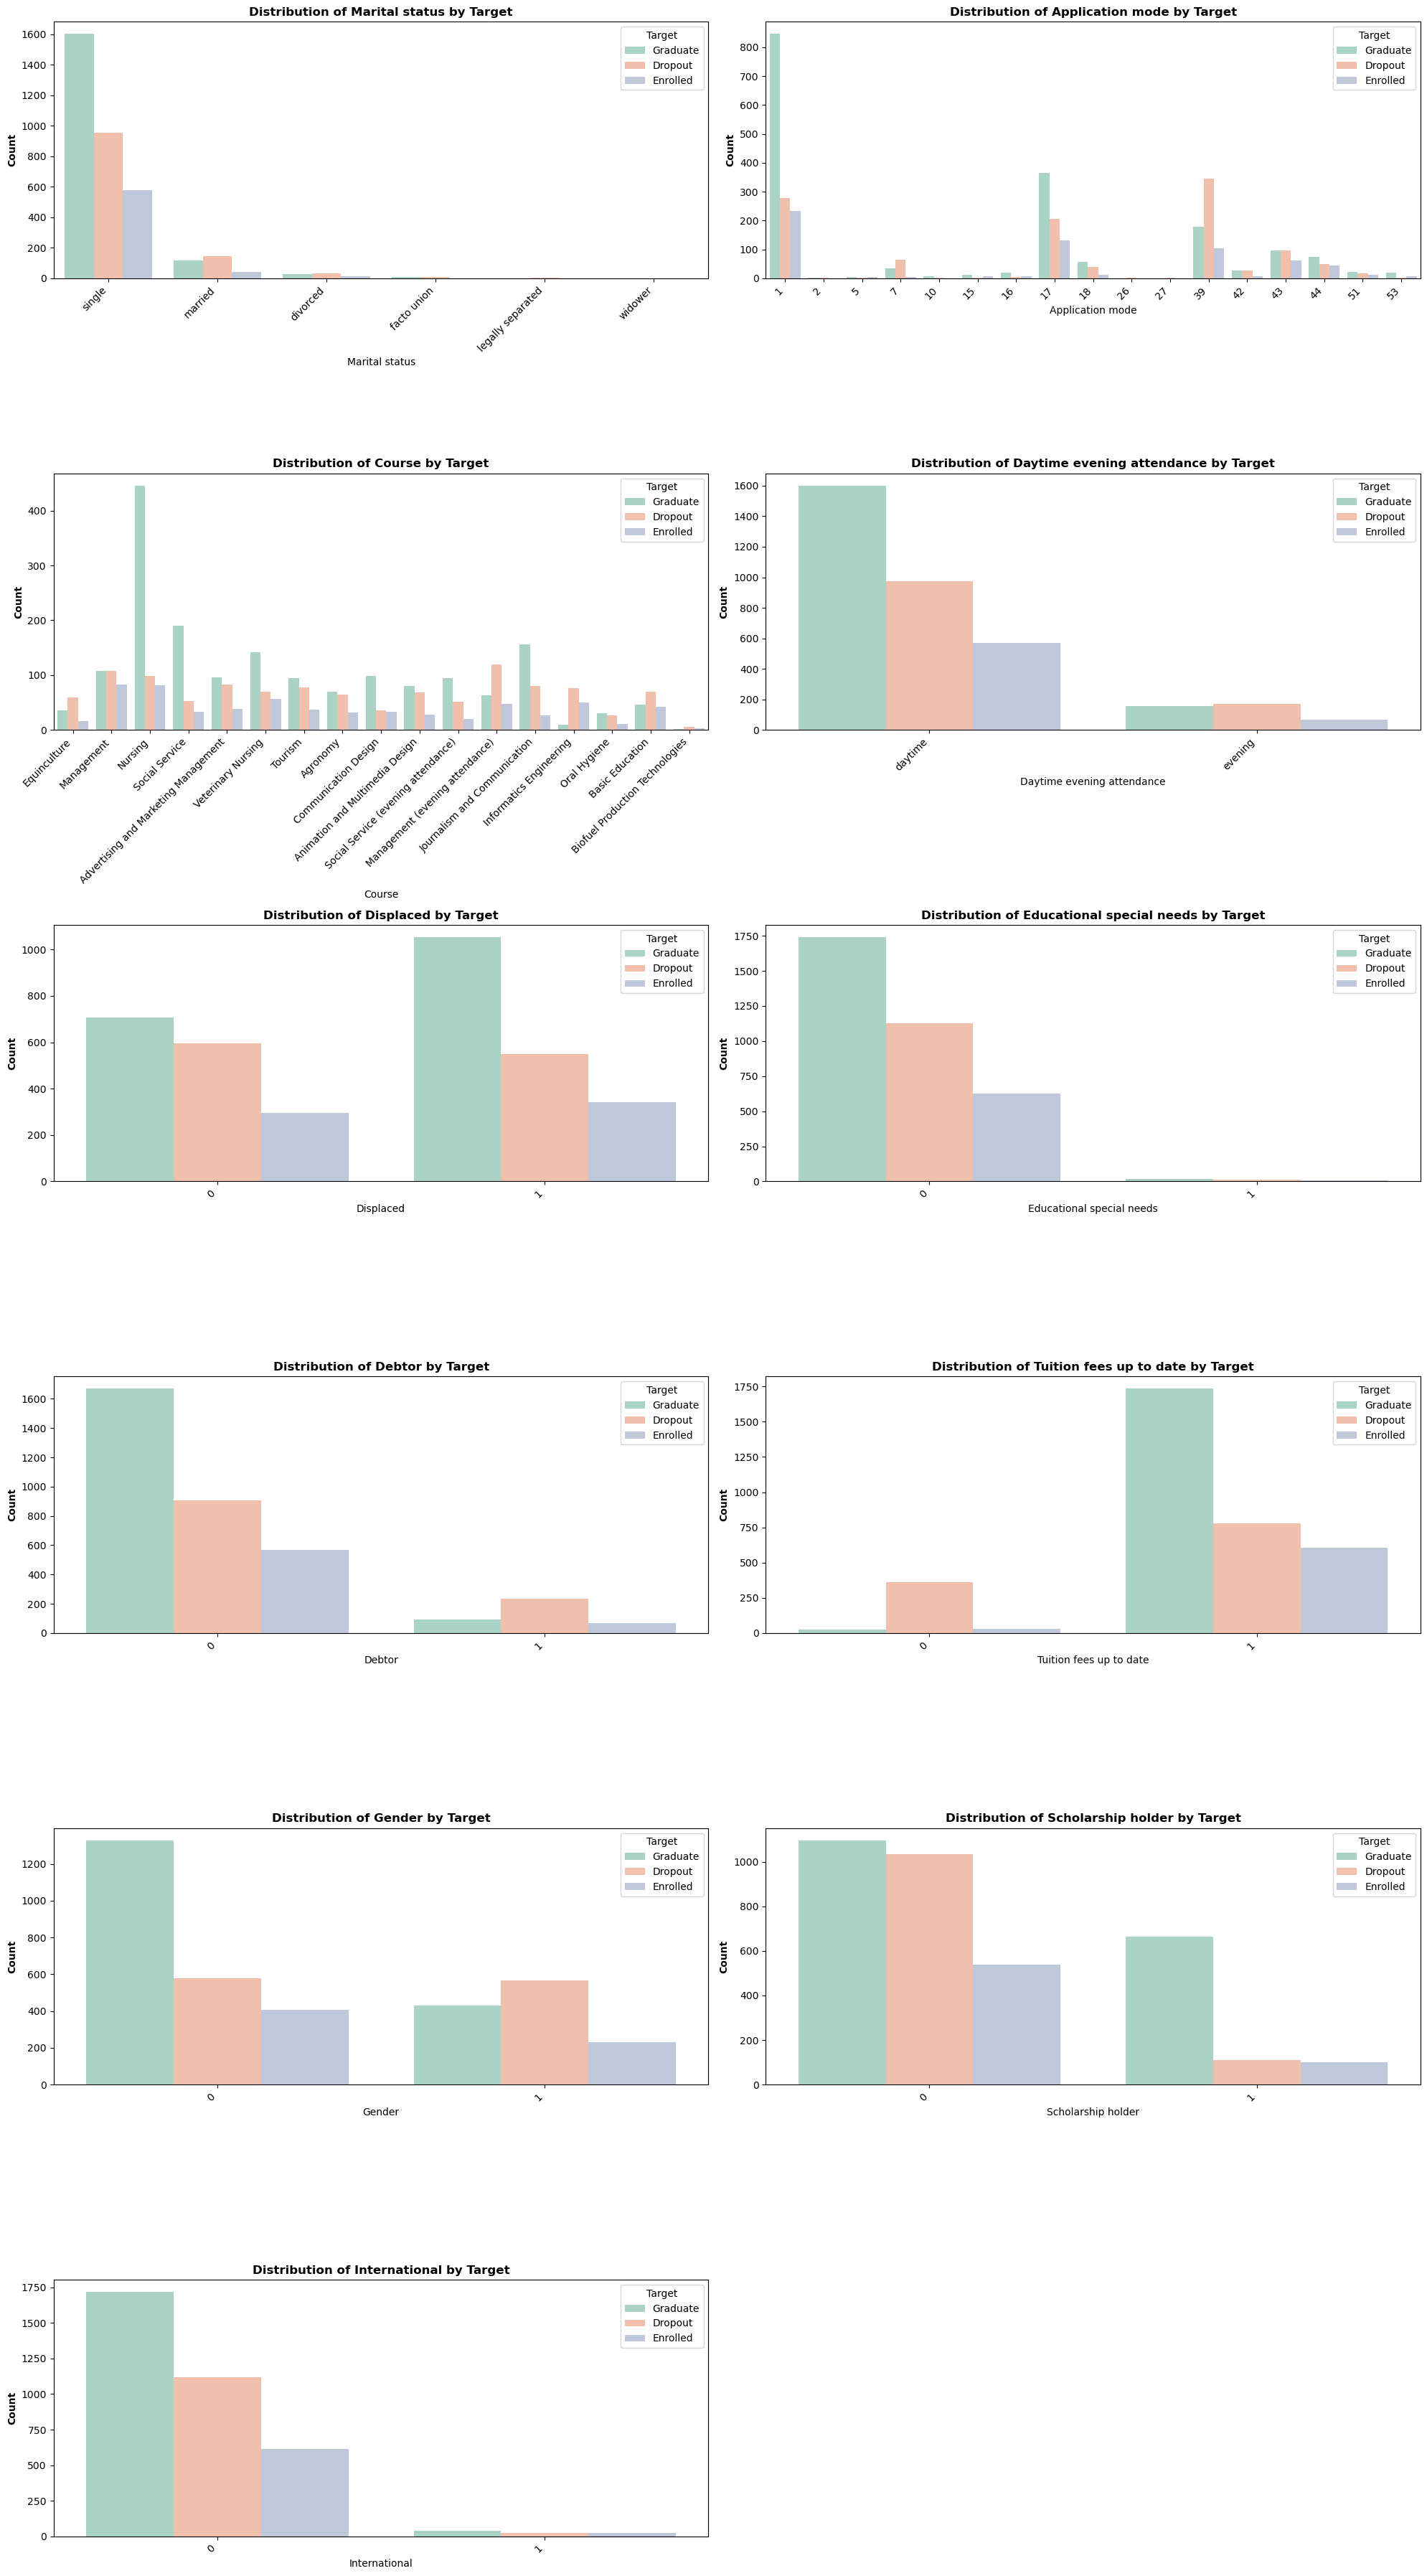

In [18]:
n_features = len(categorical_features[:3] + binary_features)
n_rows = (n_features + 1) // 2

if n_features > 0:
    fig, axes = plt.subplots(n_rows, 2, figsize=(20, 6 * n_rows))

    for i, feat in enumerate(categorical_features[:3] + binary_features):
        row = i // 2
        col = i % 2
        sns.countplot(data=train_df, x=feat, hue="Target", palette="Set2", alpha=0.6, ax=axes[row, col])
        axes[row, col].set_title("Distribution of " + feat + " by Target", fontweight='bold')
        axes[row, col].set_ylabel("Count", fontweight='bold')
        
        # Rotate x-axis labels at a 45-degree angle without triggering the warning
        
        axes[row, col].set_xticklabels(axes[row, col].get_xticklabels(), rotation=45, ha='right')

    # If there is an odd number of features, remove the last subplot
    if n_features % 2 == 1:
        fig.delaxes(axes[-1, -1])

    # Adjust layout and show plot
    plt.tight_layout()
    plt.show()
else:
    print("No features to plot.")

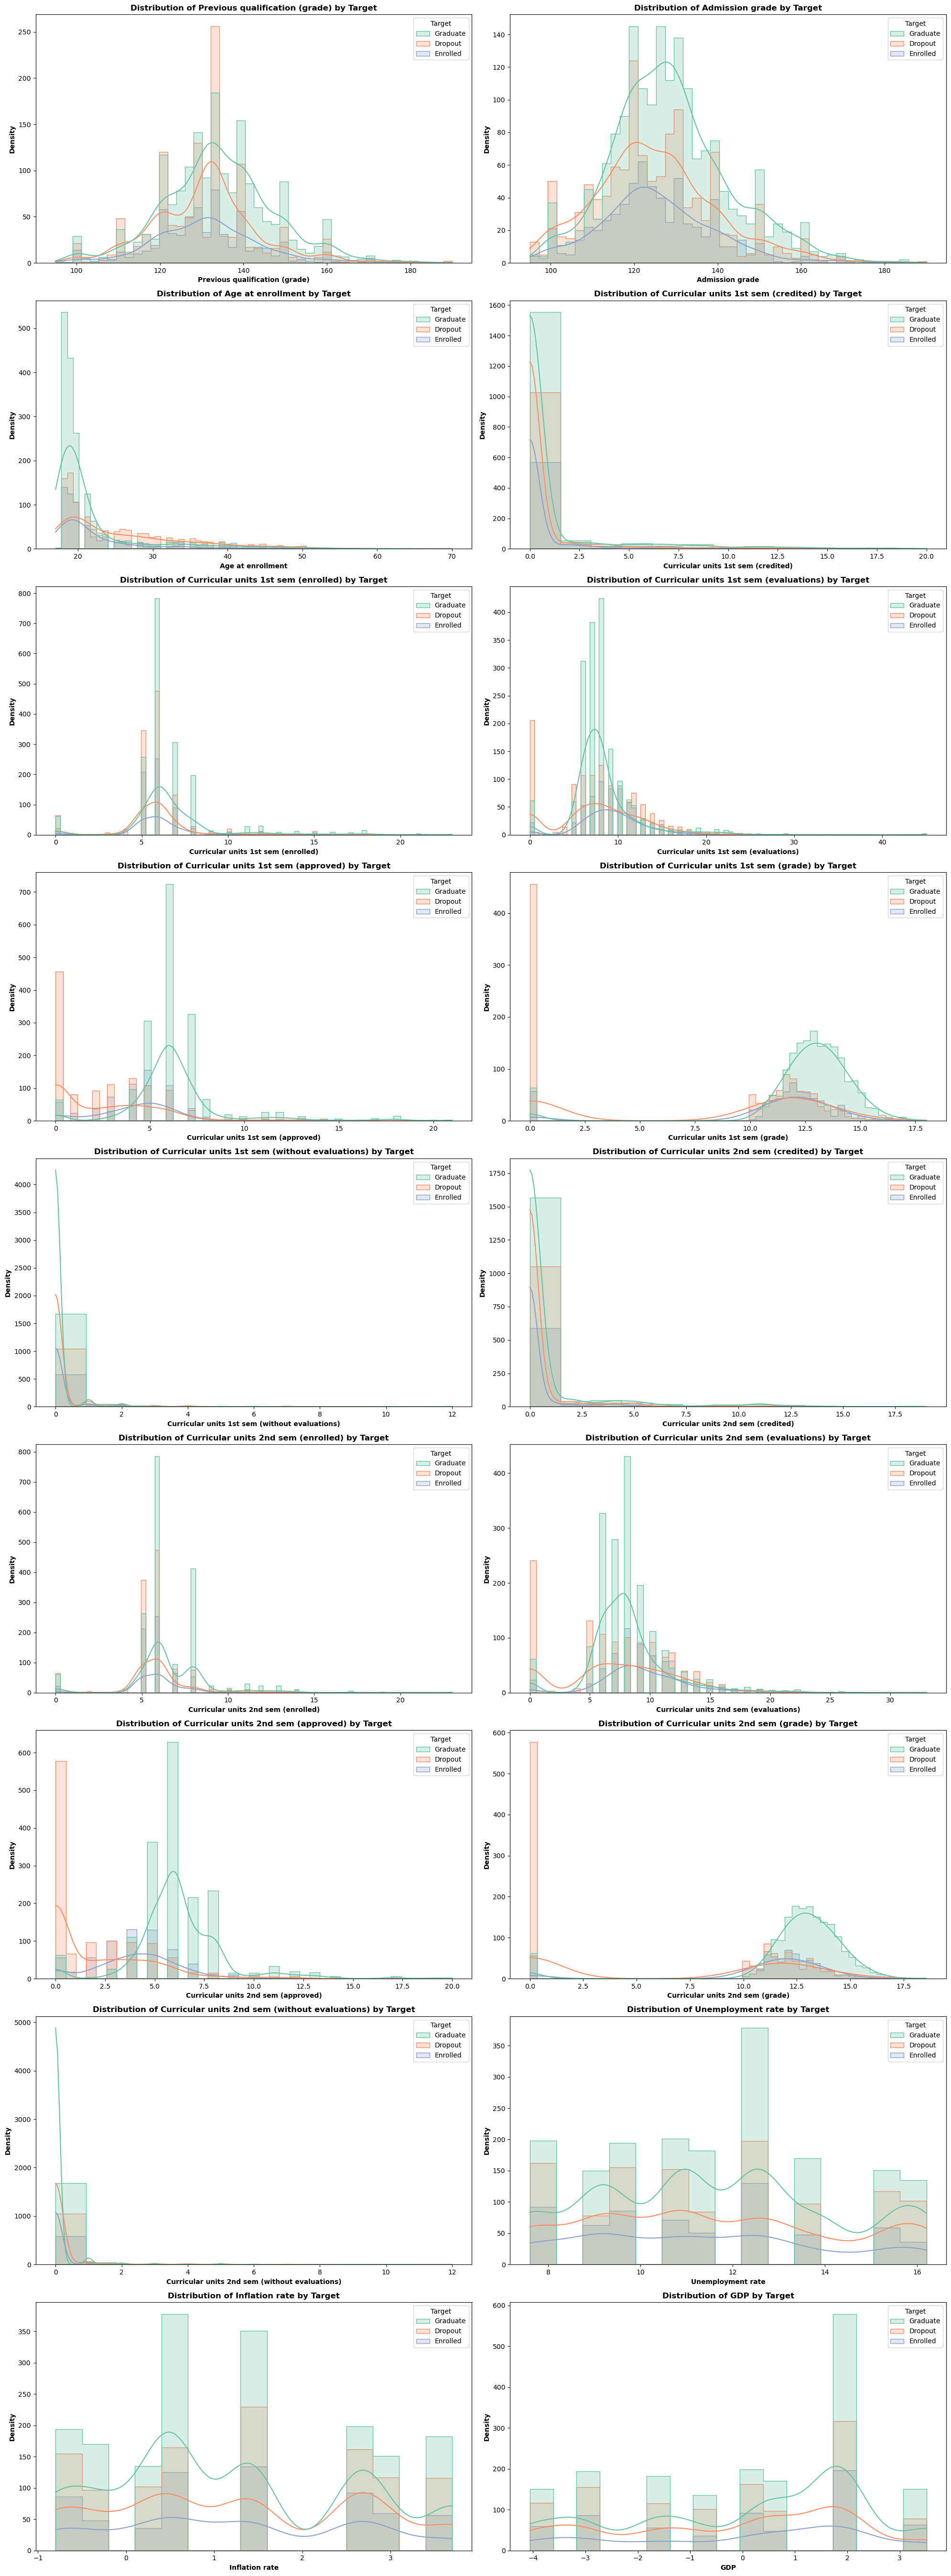

In [19]:
n_features = len(numeric_features)
n_rows = (n_features + 1) // 2  

fig, axes = plt.subplots(n_rows, 2, figsize=(20, 6 * n_rows))

for i, feat in enumerate(numeric_features):
    row = i // 2
    col = i % 2
    sns.histplot(data=train_df, x=feat, hue="Target", kde=True, palette="Set2", element="step", ax=axes[row, col])
    axes[row, col].set_title("Distribution of " + feat + " by Target", fontweight='bold')
    axes[row, col].set_xlabel(feat, fontweight='bold')
    axes[row, col].set_ylabel("Density", fontweight='bold')

# Adjust layout and show plot
plt.tight_layout()
plt.show()

### Comments Categorical Variable
1. Nationality:
The majority are Portuguese, with a small representation from other nationalities. 

2. Parents' Occupation:
Both mother's and father's occupations are coded numerically. The most common occupation code for mothers and fathers is Unskilled Workers. Be careful about the matrix sparsity issue.

3. Debtor, Tuition Fees Up to Date, Scholarship Holder:
There's a notable number of students who are debtors (397) or whose tuition fees are not up to date (419), while 871 are scholarship holders. These figures highlight the financial aspects and challenges faced by the student population.

### Comments Numeric Variable:
1. Previous Qualification (Grade) and Admission Grade:
- Both these variables have similar ranges (min 95 to max 190), indicating a possible correlation between previous academic performance and admission grades.
- The mean and median values are close, suggesting a relatively symmetric distribution for these variables.

2. Age at Enrollment:
- The age range is quite broad (17 to 70 years), indicating a diverse set of students in terms of age. Transformation technique like Standardization is required

3. Curricular Units Credited (1st and 2nd Semesters):
- The mean values for credited curricular units in both semesters are low (around 0.71 for the 1st semester and 0.54 for the 2nd), the 75% percentile is 0, suggesting that most students do not have many, if any, units credited. This could be because they are first year students.

## EDA - Bivariate Analysis:

In [20]:
numeric_subset = train_df.loc[:, numeric_features]
numeric_subset.corr('spearman').style.background_gradient(cmap='viridis')

,Previous qualification (grade),Admission grade,Age at enrollment,Curricular units 1st sem (credited),Curricular units 1st sem (enrolled),Curricular units 1st sem (evaluations),Curricular units 1st sem (approved),Curricular units 1st sem (grade),Curricular units 1st sem (without evaluations),Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP
Previous qualification (grade),1.000000,0.578391,-0.159057,0.010505,0.048490,-0.059835,0.111766,0.196821,0.003790,-0.001902,0.051313,-0.050527,0.100509,0.164922,-0.009502,0.050881,0.014993,-0.072071
Admission grade,0.578391,1.000000,-0.108484,0.068325,-0.015179,-0.095185,0.093720,0.208230,0.002485,0.066686,-0.008143,-0.065856,0.100929,0.192343,-0.019365,0.018395,-0.021738,-0.036095
Age at enrollment,-0.159057,-0.108484,1.000000,0.294940,-0.014042,0.160312,-0.177085,-0.222726,0.067121,0.297560,-0.044797,0.072174,-0.195501,-0.226871,0.099721,0.010878,0.021217,-0.065985
Curricular units 1st sem (credited),0.010505,0.068325,0.294940,1.000000,0.419246,0.366572,0.356784,0.084503,0.101356,0.913871,0.370290,0.335350,0.292361,0.079623,0.058583,0.017176,-0.004394,0.014132
Curricular units 1st sem (enrolled),0.048490,-0.015179,-0.014042,0.419246,1.000000,0.418821,0.709332,0.356468,-0.016781,0.434472,0.963011,0.433089,0.658495,0.347808,-0.028270,0.109355,0.014324,0.015773
Curricular units 1st sem (evaluations),-0.059835,-0.095185,0.160312,0.366572,0.418821,1.000000,0.268554,0.116063,0.198694,0.372213,0.386232,0.697713,0.258871,0.097156,0.147900,0.068908,-0.034846,-0.098221
Curricular units 1st sem (approved),0.111766,0.093720,-0.177085,0.356784,0.709332,0.268554,1.000000,0.636252,-0.062215,0.358720,0.701888,0.373394,0.895914,0.659513,-0.069960,0.074311,0.001878,0.063851
Curricular units 1st sem (grade),0.196821,0.208230,-0.222726,0.084503,0.356468,0.116063,0.636252,1.000000,-0.014751,0.078397,0.358079,0.174083,0.626483,0.760530,-0.046940,0.047388,-0.034993,0.094127
Curricular units 1st sem (without evaluations),0.003790,0.002485,0.067121,0.101356,-0.016781,0.198694,-0.062215,-0.014751,1.000000,0.058214,-0.027277,0.094681,-0.049464,-0.039044,0.380968,-0.055585,-0.059597,-0.185928
Curricular units 2nd sem (credited),-0.001902,0.066686,0.297560,0.913871,0.434472,0.372213,0.358720,0.078397,0.058214,1.000000,0.404750,0.340507,0.319394,0.085493,0.076092,0.003646,0.001155,0.011252


In [21]:
alt.Chart(numeric_subset).mark_point(opacity=0.3, size=5).encode(
     alt.X(alt.repeat('row'), type='quantitative', scale=alt.Scale(zero=False)),
     alt.Y(alt.repeat('column'), type='quantitative', scale=alt.Scale(zero=False))
).properties(
    width=150,
    height=150
).repeat(
    column=list(numeric_subset.columns),
    row=list(numeric_subset.columns)
)

alt.RepeatChart(...)

In [22]:
numeric_subset.head()

,Previous qualification (grade),Admission grade,Age at enrollment,Curricular units 1st sem (credited),Curricular units 1st sem (enrolled),Curricular units 1st sem (evaluations),Curricular units 1st sem (approved),Curricular units 1st sem (grade),Curricular units 1st sem (without evaluations),Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP
563,132.0,130.4,18,0,6,6,6,13.500000,0,0,6,9,5,13.2,0,8.9,1.4,3.51
509,125.0,115.2,21,0,5,6,0,0.000000,0,0,5,5,0,0.0,0,15.5,2.8,-4.06
2995,137.0,132.6,18,0,7,7,7,13.857143,0,0,8,8,8,14.9,0,13.9,-0.3,0.79
1916,136.0,130.3,18,0,7,7,6,12.600000,0,0,7,7,6,12.6,0,7.6,2.6,0.32
3389,109.0,108.3,21,0,6,15,2,10.500000,0,0,6,8,5,12.4,0,10.8,1.4,1.74


In [23]:
corr_matrix = numeric_subset.corr(method='spearman')
result_corr = dict()
for i in corr_matrix.index:
    for j in corr_matrix.columns:
        if np.abs(corr_matrix.loc[i, j]) >= 0.5 and np.abs(corr_matrix.loc[i, j]) < 1:
            temp_value = corr_matrix.loc[i, j]
            if (j, i) not in result_corr:
                result_corr[(i, j)] = temp_value
            else:
                continue


data_list = [(key[0], key[1], value) for key, value in result_corr.items()]
corr_df = pd.DataFrame(data_list, columns=['Variable 1', 'Variable 2', 'Correlation'])
corr_df      
        

,Variable 1,Variable 2,Correlation
0,Previous qualification (grade),Admission grade,0.578391
1,Curricular units 1st sem (credited),Curricular units 2nd sem (credited),0.913871
2,Curricular units 1st sem (enrolled),Curricular units 1st sem (approved),0.709332
3,Curricular units 1st sem (enrolled),Curricular units 2nd sem (enrolled),0.963011
4,Curricular units 1st sem (enrolled),Curricular units 2nd sem (approved),0.658495
5,Curricular units 1st sem (evaluations),Curricular units 2nd sem (evaluations),0.697713
6,Curricular units 1st sem (approved),Curricular units 1st sem (grade),0.636252
7,Curricular units 1st sem (approved),Curricular units 2nd sem (enrolled),0.701888
8,Curricular units 1st sem (approved),Curricular units 2nd sem (approved),0.895914
9,Curricular units 1st sem (approved),Curricular units 2nd sem (grade),0.659513


### Comments
The correlation analysis reveals key insights: 
- Students' past academic performance strongly correlated to their future success, as evidenced by the moderate correlation between previous qualification grades and admission grades (0.5784).
- Extremely high correlations in curricular units credited and enrolled across semesters (0.9139 and 0.9630, respectively) suggest consistent course loads and academic performance among students.
- Furthermore, the strong correlation between the number of enrolled and approved units in both semesters (0.7093 and 0.6585) indicates effective course management and student capability. 